In [35]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from imageio import imwrite, imread
from matplotlib.pyplot import figure, show, close, xlabel, ylabel, title
from scipy.constants import k, h, c,e
import sympy as sp
from scipy.optimize import curve_fit

In [11]:
vega_data = np.loadtxt("baseline_subtracted.txt", comments="#")
print(vega_data)

[7243.07636459 7254.32246281 7451.21975527 ...  871.94500451  874.95074311
  876.01626339]


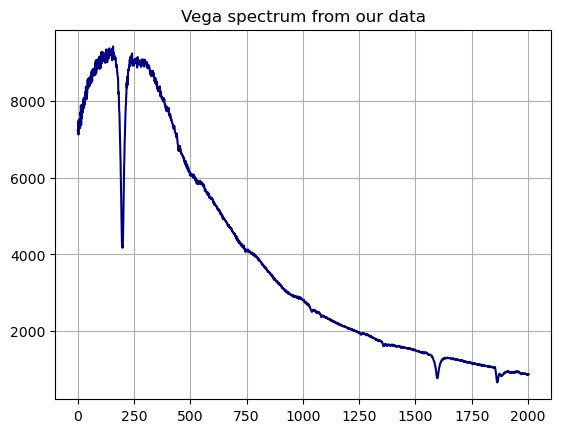

In [21]:
fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(vega_data,color="navy", label="Vega spectrum")
frame.set_title("Vega spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)

Filename: miles spectra/vega_miles.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   

data shape: (1, 4367)


KeyError: "Keyword 'CUNIT3' not found."

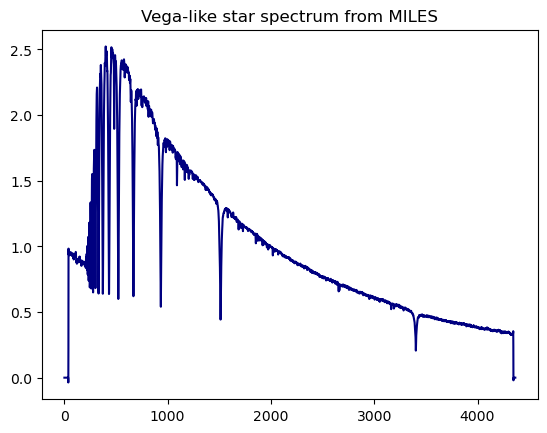

In [30]:
# getting some basic information on the miles spectrum

hdulist = fits.open('miles spectra/vega_miles.fits')
hdulist.info()
print()

hdr = hdulist[0].header
dat = hdulist[0].data
print(f"data shape: {dat.shape}")
vega_miles = dat[0,:]

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(vega_miles,color="navy", label="Vega spectrum")
frame.set_title("Vega-like star spectrum from MILES")
frame.grid(alpha=0.2)
show()
close(fig)


In [31]:
# checking coherence
print(dat.any())
print(dat.all())
print(hdr)

True
False
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 4367 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT ----------------------------------------------------------------------  COMMENT ************************** REDUCEME HEADER ***************************  COMMENT ----------------------------------------------------------------------  HISTORY Date: 06/10/**                                                          CRPIX1  =                 1.00                                                  CRVAL1  =            3500.000

In [ ]:
hdulist.close()

In [54]:
# defining functions for fitting the spectra

def f_gaussian(x, amp, mu, sigma, zero):
    """returns the value of a Gaussian function with amplitude amp centered at position mu with width sigma and 
    offset with respect to the x-axis off zero"""
    amp, mu, sigma, zero = p
    return amp * np.exp(-(x - mu) * (x - mu) / (2.0 * sigma * sigma)) + zero

def f_black_body(x, T):
    """returns the value of a black body curve equation for temperature T at position x"""
    #T=p[0]
    f=(((2*h)/((c**2)*(x**3)))*(1/(e**(h/(x*k*T))-1)))
    return f

# fitting black body curve to our Vega

T = 9600

beta, pcov = curve_fit(f_black_body, np.arange(0, vega_data.size), vega_data, T)

C:\Users\bukow\AppData\Local\Temp\ipykernel_19176\731756122.py:12: RuntimeWarning: divide by zero encountered in divide
  f=(((2*h)/((c**2)*(x**3)))*(1/(e**(h/(x*k*T))-1)))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 400.

here's the GitHub commit message prefixes:
-feat (add feature)
-fix (repaired bug/broken code)
-refactor (changed code structure but didnt add new features)
-style (if you just changed some minor thing, spelling, variable names, ect.)